In [1]:
import pandas as pd
import fiona
import geopandas as gpd
import shapely

In [2]:
df = pd.read_csv('D:/projects/ИДСТУ/Населенные пункты ИО/data/localities.csv')

Проверка корректности геометрии

<AxesSubplot:>

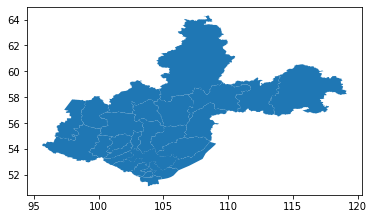

In [3]:
gpd.GeoDataFrame(df, geometry = df.poly_wkt.apply(lambda x: shapely.wkt.loads(x))).plot()

In [52]:
df_ms = pd.read_excel('data/meteostation.xlsx')

In [68]:
df_temp = pd.read_csv('D:/projects/ИДСТУ/geoprocessing/collecting the borders of localities/data/temp02022022.csv')

In [69]:
df = pd.concat([df, df_temp], ignore_index = True)

In [70]:
df_ms.loc[df_ms.district=='Мамско-Чуйский'].merge(df.loc[df.ado=='Мамско-Чуйский'].rename(columns ={'name':'NP'})[['NP', 'poly_wkt']], 
            on = 'NP', how = 'left')

,district,NP,station,number,lat_station,lon_station,lat,lon,poly_wkt
0,Мамско-Чуйский,Витимский,Мама,30157,58.300000,112.900000,NaN,NaN,"POLYGON ((113.247333 58.219396, 113.247584 58...."
1,Мамско-Чуйский,Горно-Чуйский,Улан-Макит,30356,56.366667,114.633333,NaN,NaN,"POLYGON ((111.724134 57.636086, 111.725552 57...."
2,Мамско-Чуйский,Камчатка,Леприндо,30374,56.650000,117.566667,NaN,NaN,NaN
3,Мамско-Чуйский,Рысья,Витим,30054,59.450000,112.583333,NaN,NaN,"POLYGON ((112.149075 57.693762, 112.150472 57...."
4,Мамско-Чуйский,Садки,Витим,30054,59.450000,112.583333,NaN,NaN,"POLYGON ((112.028255 59.182365, 112.028426 59...."
5,Мамско-Чуйский,Согдиондон,Улан-Макит,30356,56.366667,114.633333,NaN,NaN,"POLYGON ((111.946012 59.202087, 111.947633 59...."
6,Мамско-Чуйский,Чуя,Витим,30054,59.450000,112.583333,NaN,NaN,"POLYGON ((112.408219 59.264067, 112.410454 59...."
7,Мамско-Чуйский,Воронцовка,Мама,30157,58.300000,112.900000,NaN,NaN,"POLYGON ((112.897699 58.853184, 112.897715 58...."
8,Мамско-Чуйский,Колотовка,Мама,30157,58.300000,112.900000,NaN,NaN,"POLYGON ((113.188031 58.219567, 113.188637 58...."
9,Мамско-Чуйский,Луговский,Мама,30157,58.300000,112.900000,NaN,NaN,"MULTIPOLYGON (((112.887024 58.062487, 112.8876..."


In [85]:
df.to_csv('data/localities.csv', index = False)

In [95]:
temp = df_ms.loc[df_ms.district=='Мамско-Чуйский'].merge(df.loc[df.ado=='Мамско-Чуйский'].rename(columns ={'name':'NP'})[['NP', 'poly_wkt']], 
            on = 'NP', how = 'left')

In [107]:
temp.loc[2, 'poly_wkt'] = 'POINT(113.366667 58.3)'

In [116]:
temp.to_csv('data/mamsko.csv', index = False)

In [117]:
t_ns = pd.read_csv('mamsko_nearest_station_v2.csv')

In [119]:
mamsko = temp = temp.merge(t_ns[['NP','HubName', 'HubDist']], on = 'NP')

In [81]:
kirensky = temp = temp.replace('Верхе-Марково', 'Верхне-Марково')

In [123]:
ms = pd.concat([bodaibo, kirensky, mamsko], ignore_index = True)

In [124]:
ms.drop(columns = ['lat', 'lon'], inplace = True)

In [126]:
ms['centroid'] = ms.poly_wkt.apply(lambda x: shapely.wkt.loads(x).centroid)

In [137]:
ms.loc[ms.HubDist.isna(), 'HubName'] = ms.loc[ms.HubDist.isna(), 'station']

In [140]:
ms.to_csv('data/meteostations.csv', index = False)

Метеостанции, которые не подходят для населенных пунктов (слишком далеки) ~ не должны использоваться

In [139]:
set(ms['station']) - set(ms['HubName'])

{'Леприндо', 'Улан-Макит'}

# Подсчет КП

In [2]:
ms = pd.read_csv('data/meteostations.csv')

In [3]:
ms.loc[ms.station.isin(list(set(ms['HubName'])))][['station', 'number']].drop_duplicates()

,station,number
0,Мача,30074
2,Мамакан,30252
3,Светлый,30165
5,Бодайбо,30253
8,Перевоз,30069
12,Витим,30054
13,Верхне-Марково,30229
15,Киренск,30230
37,Мама,30157


In [67]:
ms

,district,NP,station,number,lat_station,lon_station,poly_wkt,HubName,HubDist,centroid
0,Бодайбинский,Большой Патом,Мача,30074,59.900000,117.583333,"POLYGON ((116.897001 60.074239, 116.897658 60....",Мача,43.020869,POINT (116.8999046614656 60.07851816221432)
1,Бодайбинский,Кропоткин,Улан-Макит,30356,56.366667,114.633333,"POLYGON ((115.29095 58.500999, 115.29167 58.50...",Светлый,42.835905,POINT (115.3025809627534 58.50534064629347)
2,Бодайбинский,Мамакан,Мамакан,30252,57.816667,114.000000,"POLYGON ((113.971601 57.81712599999999, 113.97...",Мамакан,0.486705,POINT (114.0080953186704 57.81600853204305)
3,Бодайбинский,Апрельск,Светлый,30165,58.416667,116.016667,"POLYGON ((114.570117 58.18923299999999, 114.57...",Бодайбо,42.145136,POINT (114.5788012716899 58.18594506566297)
4,Бодайбинский,Артемовский,Светлый,30165,58.416667,116.016667,"POLYGON ((114.610988 58.201928, 114.611386 58....",Бодайбо,46.169073,POINT (114.6459025954676 58.20662439374149)
5,Бодайбинский,Балахнинский,Бодайбо,30253,57.857700,114.224000,"POLYGON ((114.26588 58.01275099999999, 114.266...",Бодайбо,17.221002,POINT (114.2790727374294 58.00951945162982)
6,Бодайбинский,Васильевский,Бодайбо,30253,57.857700,114.224000,"POLYGON ((114.319109 58.140819, 114.319559 58....",Бодайбо,32.080280,POINT (114.3357619279151 58.13955306909041)
7,Бодайбинский,Маракан,Светлый,30165,58.416667,116.016667,"POLYGON ((114.565399 58.696592, 114.565475 58....",Бодайбо,96.070209,POINT (114.5837966131669 58.69914702836216)
8,Бодайбинский,Перевоз,Перевоз,30069,59.000000,116.917000,"POLYGON ((116.891567 58.987838, 116.894362 58....",Перевоз,0.093969,POINT (116.9154356209777 58.99975484904515)
9,Бодайбинский,Светлый,Светлый,30165,58.416667,116.016667,"POLYGON ((115.955212 58.435146, 115.955796 58....",Светлый,3.744714,POINT (115.9644231464427 58.4361409248125)


In [73]:
dfs = []
for i, r in ms[['station', 'number']].drop_duplicates().iterrows():
    
    df = pd.read_csv('data/'+r['station']+'.'+str(r['number'])+'.01.01.2017.31.12.2020.csv', sep = ';', encoding = 'cp1251')
    
    df['station'] = r['station']
    df['number'] = r['number']
    df['RRR'] = df['RRR'].replace('Осадков нет', 0)
    df['RRR'] = df['RRR'].replace('Следы осадков', 0).astype(float)
    df.rename(columns = {df.columns[0]:'datetime'}, inplace = True)
    df[['date', 'time']] = df['datetime'].str.split(' ', expand = True)
    
    df_temp = df.loc[df['RRR']>2.5][['date']].drop_duplicates()
    df_temp['n'] = 0
    df = df.merge(df_temp, on = 'date', how = 'left')
    
    df_temp = df.groupby('date').mean().reset_index()
    df_temp['t(t-r)'] = df_temp['T']*(df_temp['T']-df_temp['Td'])
    df = df.merge(df_temp[['date', 't(t-r)']], on = 'date', how = 'left')
    
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['date'] = pd.to_datetime(df['date'])
    
    df_temp = df.groupby('date').mean().reset_index().sort_values('date')
    df_temp['kp'] = 0
    check = True
    for i, r in df_temp.iterrows():
        if r['n'] != 0 and check:
            df_temp.loc[i, 'n'] = 0
        elif r['n'] !=0 and not check:
            s+=1
            df_temp.loc[i, 'n'] = s
            df_temp.loc[i, 'kp'] = df_temp.loc[i, 't(t-r)'] + df_temp.loc[i-1, 'kp'] 
        else:
            check = False
            s = 0
            df_temp.loc[i, 'kp'] = df_temp.loc[i, 't(t-r)']
    
    df = df.drop(columns = 'n').merge(df_temp[['date', 'n', 'kp']], on = 'date', how = 'left')
    
    dfs.append(df[['station','date', 'time', 'datetime', 'sss', 'RRR', 'T', 'Td', 't(t-r)', 'n', 'kp']])

In [80]:
pd.concat(dfs).sort_values(['station','datetime']).to_csv('data/kp_po_forcast.csv', index = False)

In [94]:
df_all = pd.concat(dfs, ignore_index=True).sort_values(['station','datetime'])

In [81]:
df_all.loc[df_all.station.isin(ms.HubName.drop_duplicates())].sort_values(['station','datetime']).to_csv('data/kp_po_forcast_nearest_station.csv', index = False)

In [106]:
df_all['sss'] = df_all.sss.replace('Измерение невозможно или неточно.', float('NaN'))
df_all['sss'] = df_all.sss.replace('Снежный покров не постоянный.', float('NaN'))
df_all['sss'] = df_all.sss.replace('Менее 0.5', float('NaN'))

In [113]:
df_all['sss'] = df_all['sss'].astype(float)

In [128]:
df_temp = df_all[['station', 'date', 't(t-r)', 'n', 'kp']].drop_duplicates() \
    .merge(df_all.groupby(['station', 'date']).max().reset_index()[['station', 'date', 'RRR']], how = 'left', on = ['station', 'date']) \
    .merge(df_all.groupby(['station', 'date']).mean().reset_index()[['station', 'date', 'T', 'Td', 'sss']], how = 'left', on = ['station', 'date']) \
#     .to_csv('data/kp_po_forcast_by_day.csv', index = False)

In [130]:
df_temp.loc[df_temp.station.isin(ms.HubName.drop_duplicates())].sort_values(['station','date']) \
    .to_csv('data/kp_po_forcast_nearest_station_by_day.csv', index = False)